In [1]:
% matplotlib inline
import numpy as np              # import numpy library as np
import matplotlib.pyplot as plt # import pyplot library as plt 
plt.style.use('ggplot')         # use "ggplot" style for graphs

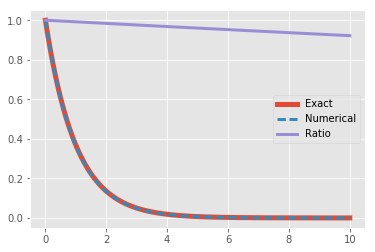

In [5]:
# Euler method
dt, tmin, tmax = 0.02, 0.0, 10.0 # set \Delta t,t0,tmax
step=int((tmax-tmin)/dt)
# create array t from tmin to tmax with equal interval dt 
t  = np.linspace(tmin,tmax,step)
y  = np.zeros(step) # initialize array y as all 0
ya = np.exp(-t) # analytical solution y=exp(-t)
plt.plot(t,ya,label='Exact',lw=5) # plot y vs. t (analytical)
y[0]=1.0 # initial condition
for i in range(step-1):
    y[i+1]=y[i]-dt*y[i] # Euler method Eq.(A8)
plt.plot(t,y,ls='--',lw=3,label='Numerical') # plot y vs t (numerical)
plt.plot(t,y/ya,lw=3,label='Ratio') # plot y/ya vs. t
plt.legend() #display legends
plt.show() #display plots

# Homework
1. Compare the Euler method with the Taylor expansion
$$
y_{i+1}=y_i+\Delta t \frac{dy}{dt}+\frac{\Delta t^2}{2} \frac{d^2y}{dt^2}+\frac{\Delta t^3}{3} \frac{d^3y}{dt^3}+\cdots
$$
to find the order of the method in terms of $\Delta t$.
1. Compare the Leapfrog method with the Taylor expansion to find the order of the method in terms of $\Delta t$.
1. Use the code example for the Euler method and examine the amplitude of the numerical errors (i.e. deviations of y/ya from 1), by changing the time increment to dt=0.01, 0.05, 0.1, 0,5, and 0.9.
1. Perform the same error analysis for the Runge-Kutta (2nd order) method by modifing the code example for the Euler method.
1. Perform the same error analysis for the Runge-Kutta (4th order) method.

1. Euler method:

$$
y_{i+1}=y_i+\Delta t f_i=y_i+\Delta t \left.\frac{dy}{dt}\right|_{i}\tag{AH1}
$$

Taylor expansion ($+\Delta t$):

$$
y_{i+1}=y_i+\Delta t \left.\frac{dy}{dt}\right|_{i}+\frac{\Delta t^2}{2} \left.\frac{d^2y}{dt^2}\right|_{i}+\left.\frac{\Delta t^3}{3} \frac{d^3y}{dt^3}\right|_{i}+\cdots
\tag{AH2}
$$
$\rightarrow$ 1st order



2. Leapfrog method:

$$
y_{i+1}=y_{i-1}+2\Delta t f_i=y_i+2\Delta t \left.\frac{dy}{dt}\right|_{i}\tag{AH3}
$$

Taylor expansion ($-\Delta t$):

$$
y_{i-1}=y_i-\Delta t \left.\frac{dy}{dt}\right|_{i}+\frac{\Delta t^2}{2} \left.\frac{d^2y}{dt^2}\right|_{i}-\left.\frac{\Delta t^3}{3} \frac{d^3y}{dt^3}\right|_{i}+\cdots\tag{AH4}
$$
Eq.(AH2)-Eq.(AH4) gives
$$
y_{i+1}=y_{i-1}+2\Delta t \left.\frac{dy}{dt}\right|_{i}
- 0 
+\left.\frac{2\Delta t^3}{3} \frac{d^3y}{dt^3}\right|_{i}+\cdots\tag{AH5}
$$
$\rightarrow$ 2nd order

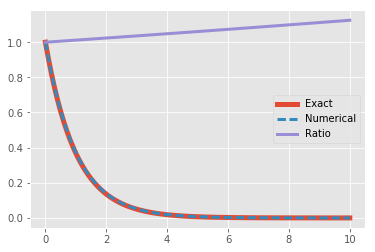

In [3]:
# Runge-Kutta 2nd
dt, tmin, tmax = 0.1, 0.0, 10.0 # set \Delta t, t0, tmax
step=int((tmax-tmin)/dt)
# create array t from tmin to tmax with equal interval dt 
t = np.linspace(tmin,tmax,step)
y = np.zeros(step) # initialize array y as all 0
y1 = np.zeros(step) # initialize array y1 as all 0
ya = np.exp(-t) # analytical solution y=exp(-t)
plt.plot(t,ya,lw=5,label='Exact') # plot y vs. t (analytical)
y[0]=1.0 # initial condition
for i in range(step-1):
    y1[i]=y[i]-0.5*dt*y[i] # Runge-Kutta Eq.(A15)
    y[i+1]=y[i]-dt*y1[i] # Runge-Kutta Eq.(A16)
plt.plot(t,y, lw=3,ls='--',label='Numerical')# plot y vs t (numerical)
plt.plot(t,y/ya,lw=3,label='Ratio') # plot y/ya vs. t
plt.legend() # display legend
plt.show() # display plots

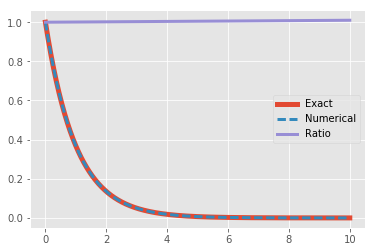

In [3]:
# Runge-Kutta 4th
dt,tmin,tmax =0.01,0.0,10.0 # set \Delta t, t0, tmax
step=int((tmax-tmin)/dt)
# create array t from tmin to tmax with equal interval dt
t = np.linspace(tmin,tmax,step)
y = np.zeros(step) # initialize array y as all 0
y1 = np.zeros(step) # initialize array y1 as all 0
y2 = np.zeros(step) # initialize array y2 as all 0
y3 = np.zeros(step) # initialize array y3 as all 0
ya = np.exp(-t) # analytical solution y=exp(-t)
plt.plot(t,ya,lw=5,label='Exact') # plot y vs. t (analytical)
y[0]=1.0 # initial condition
for i in range(step-1):
    y1[i]=y[i]-0.5*dt*y[i] # Runge-Kutta Eq.(A18)
    y2[i]=y[i]-0.5*dt*y1[i] # Runge-Kutta Eq.(A19)
    y3[i]=y[i]-dt*y2[i] # Runge-Kutta Eq.(A20)
    # Runge-Kutta Eq.(A21)
    y[i+1]=y[i]-dt*(y[i]+2.0*y1[i]+2.0*y2[i]+y3[i])/6.0
plt.plot(t,y,lw=3,ls='--',label='Numerical') # plot y vs t (numerical)
plt.plot(t,y/ya,lw=3, label="Ratio") # plot y/ya vs. t
plt.legend() # display legend
plt.show() # display plots